# Cantilever beams with different element types
[![Google Collab Book](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/meyer-nils/torch-fem/blob/main/examples/basic/planar/cantilever.ipynb)

This example showcases the use of different planar element types for a simple cantilever beam.

In [1]:
import meshzoo
import numpy as np
import torch

from torchfem import Planar
from torchfem.elements import linear_to_quadratic
from torchfem.materials import IsotropicElasticityPlaneStress

# Set double precision
torch.set_default_dtype(torch.float64)

# Material model (plane stress)
material = IsotropicElasticityPlaneStress(E=1000.0, nu=0.3)

## A simple cantilever beam with first order quads

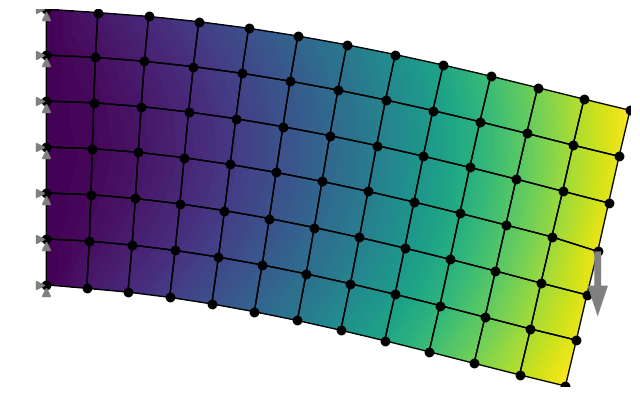

In [2]:
points, cells = meshzoo.rectangle_quad(
    np.linspace(0.0, 2.0, 13),
    np.linspace(0.0, 1.0, 7),
    cell_type="quad4",
)
nodes = torch.tensor(points, dtype=torch.get_default_dtype())
elements = torch.tensor(cells.tolist())

# Create model
cantilever = Planar(nodes, elements, material)

# Load at tip
tip = (nodes[:, 0] == 2.0) & (nodes[:, 1] == 0.5)
cantilever.forces[tip, 1] = -1.0

# Constrained displacement at left end
left = nodes[:, 0] == 0.0
cantilever.constraints[left, :] = True

# Thickness
cantilever.thickness[:] = 0.1

# Solve
u, f, σ, F, α = cantilever.solve()

# Plot
cantilever.plot(u, node_property=torch.norm(u, dim=1), node_markers=True)

## A simple cantilever beam with second order quads

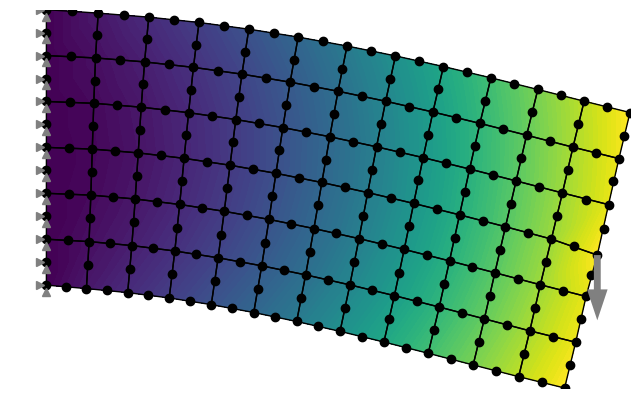

In [3]:
# Upgrade elements to quadratic
nodes, elements = linear_to_quadratic(nodes, elements)

# Create model
cantilever = Planar(nodes, elements, material)

# Load at tip
tip = (nodes[:, 0] == 2.0) & (nodes[:, 1] == 0.5)
cantilever.forces[tip, 1] = -1.0

# Constrained displacement at left end
left = nodes[:, 0] == 0.0
cantilever.constraints[left, :] = True

# Thickness
cantilever.thickness[:] = 0.1

# Solve
u, f, σ, F, α = cantilever.solve()

# Plot
cantilever.plot(u, node_property=torch.norm(u, dim=1), node_markers=True)

## A simple cantilever beam with first order triangles 

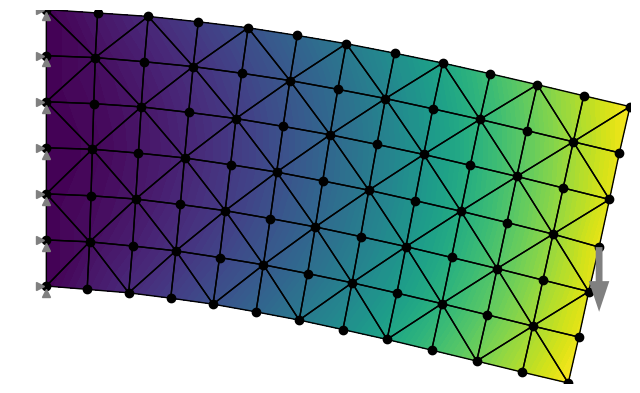

In [4]:
points, cells = meshzoo.rectangle_tri(
    np.linspace(0.0, 2.0, 13),
    np.linspace(0.0, 1.0, 7),
    variant="zigzag",
)
nodes = torch.tensor(points, dtype=torch.get_default_dtype())
elements = torch.tensor(cells.tolist())

cantilever = Planar(nodes, elements, material)

# Load at tip
tip = (nodes[:, 0] == 2.0) & (nodes[:, 1] == 0.5)
cantilever.forces[tip, 1] = -1.0

# Constrained displacement at left end
left = nodes[:, 0] == 0.0
cantilever.constraints[left, :] = True

# Thickness
cantilever.thickness[:] = 0.1

# Solve
u, f, σ, F, α = cantilever.solve()
# Plot
cantilever.plot(u, node_property=torch.norm(u, dim=1), node_markers=True)

## A simple cantilever beam with second order triangles 

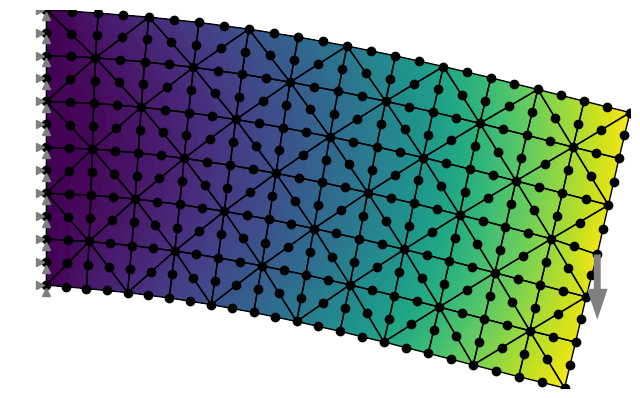

In [5]:
# Upgrade elements to quadratic
nodes, elements = linear_to_quadratic(nodes, elements)

# Create model
cantilever = Planar(nodes, elements, material)

# Load at tip
tip = (nodes[:, 0] == 2.0) & (nodes[:, 1] == 0.5)
cantilever.forces[tip, 1] = -1.0

# Constrained displacement at left end
left = nodes[:, 0] == 0.0
cantilever.constraints[left, :] = True

# Thickness
cantilever.thickness[:] = 0.1

# Solve
u, f, σ, F, α = cantilever.solve()

# Plot
cantilever.plot(u, node_property=torch.norm(u, dim=1), node_markers=True)